# 11. Sampling Methods

## 11.1.2 Rejection sampling

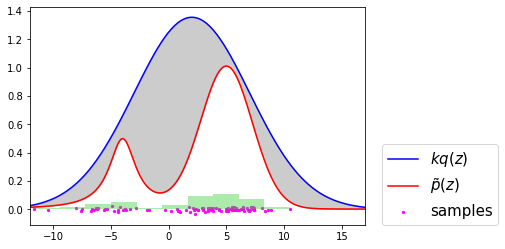

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *


# target function ~p(z)
func = lambda x : 1 / (2 + (x + 4) ** 2) + np.exp(-(x - 5) ** 2 / 10)
# proposal distribution q(z)
proba = Gaussian(mu=2., var=25.)

''' Rejection sampling '''
sampler = RejectionSampling(target=func, prop=proba, offset=17)
samples = sampler.rvs(size=100)


x = np.linspace(-12, 17, 200)
plt.plot(x, sampler.k * proba.pdf(x), label=r"$kq(z)$", c='b')
plt.plot(x, func(x), label=r"$\tilde{p}(z)$", c='r')
plt.fill_between(x, func(x), sampler.k * proba.pdf(x), color="gray",alpha=0.4)
plt.hist(samples, density=True, alpha=0.4, color='limegreen')
plt.scatter(samples, np.random.normal(scale=.01, size=len(samples)), s=5, label="samples", c='magenta')
plt.xlim(-12, 17)
plt.legend(bbox_to_anchor=(1.05, 0.), loc='lower left', borderaxespad=0, fontsize=15)
plt.show()

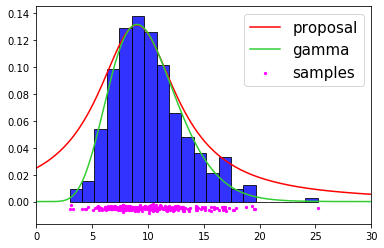

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from sampling import *


# target function ~p(z)
func = lambda x : Gamma(alpha=10, beta=1).pdf(x)
# proposal distribution q(z)
proba = Cauchy(x0=10 - 1, gamma=np.sqrt(2 * 10 - 1))

''' Rejection Sampling'''
sampler = RejectionSampling(target=func, prop=proba, offset=1.8)
samples = sampler.rvs(size=300)


x = np.linspace(0, 30, 200)
plt.plot(x, sampler.k * proba.pdf(x), label="proposal", c='r')
plt.plot(x, func(x), label="gamma", c='limegreen')
plt.hist(samples, bins=20, density=True, color='b', ec='k', alpha=.8)
plt.scatter(samples, np.random.normal(scale=.001, size=len(samples)) - .005, s=5, label="samples", c='magenta')
plt.legend(fontsize=15)
plt.xlim(0, 30)
plt.show()